<a href="https://colab.research.google.com/github/PratikSawant22/Machine-Learning/blob/main/CatVsDogClassification/Cat_Vs_Dog_ImageClassification(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pratiksawant22","key":"4213fe2628df9e0095bc038cb1b50518"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-01 11:18:46           6574  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           3856  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1322  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           2065  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
! kaggle competitions download -c dogs-vs-cats

 98% 535M/543M [00:04<00:00, 191MB/s]
100% 543M/543M [00:04<00:00, 132MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 78.8MB/s]
 96% 260M/271M [00:03<00:00, 75.7MB/s]
100% 271M/271M [00:03<00:00, 78.2MB/s]


In [ ]:
! unzip train.zip 

In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
import os
import cv2

def load_image(file_path):
    return cv2.imread(file_path)

def extract_label(file_name):
    return 1 if "dog" in file_name else 0

train_path = "./train/"
image_files = os.listdir(train_path)
train_images = [load_image(train_path + file) for file in image_files]
train_labels = [extract_label(file) for file in image_files]

In [ ]:
print(train_images[12])
print(train_labels[12])

[[[ 94  97 236]
  [ 98 102 237]
  [ 97 105 236]
  ...
  [ 39  48  28]
  [ 52  62  39]
  [111 124  98]]

 [[102 102 250]
  [100 104 247]
  [ 98 104 241]
  ...
  [ 52  61  41]
  [ 72  82  59]
  [130 144 116]]

 [[109 105 255]
  [108 106 255]
  [107 107 255]
  ...
  [ 73  82  61]
  [101 112  86]
  [155 169 141]]

 ...

 [[ 22  25  30]
  [ 25  28  33]
  [ 28  31  36]
  ...
  [ 12  12  12]
  [ 12  12  12]
  [  9   9   9]]

 [[ 13  16  21]
  [ 16  19  24]
  [ 19  22  27]
  ...
  [ 11  11  11]
  [ 11  11  11]
  [  9   9   9]]

 [[  8  11  16]
  [ 10  13  18]
  [ 13  16  21]
  ...
  [ 10  10  10]
  [  9   9   9]
  [  9   9   9]]]
1


In [ ]:
def preprocess(img , size = 96):
    min_side = min(img.shape[0] , img.shape[1])
    img = img[:min_side ,:min_side]
    img = cv2.resize(img, (size,size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img / 255.0

In [ ]:
print(preprocess(train_images[12]))

[[0.58823529 0.58431373 0.82352941 ... 0.15686275 0.15294118 0.29411765]
 [0.61960784 0.79215686 0.80392157 ... 0.13333333 0.18823529 0.58039216]
 [0.54901961 0.63137255 0.6        ... 0.2627451  0.38039216 0.60392157]
 ...
 [0.76862745 0.68627451 0.39607843 ... 0.01568627 0.01960784 0.02352941]
 [0.35294118 0.2745098  0.37647059 ... 0.02352941 0.00784314 0.01960784]
 [0.21960784 0.24705882 0.2745098  ... 0.00392157 0.00392157 0.        ]]


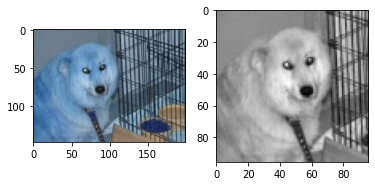

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
i = 10000
plt.subplot(1,2,1)
plt.imshow(train_images[i])
plt.subplot(1,2,2)
plt.imshow(preprocess(train_images[i]),cmap="gray")

In [ ]:
for i in range(len(train_images)):
    train_images[i] = preprocess(train_images[i])

In [ ]:
import numpy as np
train_images = np.expand_dims(train_images , axis = -1 )
train_labels = np.array(train_labels)
print(train_images.shape , train_labels.shape)

(25000, 96, 96, 1) (25000,)


In [ ]:
import tensorflow as tf
print("Tensorflow:", tf.__version__)

layers = [
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=train_images.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)
]

model = tf.keras.Sequential(layers)
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=5, batch_size=50)

Tensorflow: 2.5.0
Epoch 1/5
500/500 [==============================] - 37s 14ms/step - loss: 0.6489 - sparse_categorical_accuracy: 0.6117
Epoch 2/5
500/500 [==============================] - 7s 14ms/step - loss: 0.4724 - sparse_categorical_accuracy: 0.7752
Epoch 3/5
500/500 [==============================] - 7s 14ms/step - loss: 0.3654 - sparse_categorical_accuracy: 0.8351
Epoch 4/5
500/500 [==============================] - 7s 14ms/step - loss: 0.2983 - sparse_categorical_accuracy: 0.8692
Epoch 5/5
500/500 [==============================] - 7s 14ms/step - loss: 0.2505 - sparse_categorical_accuracy: 0.8911


In [ ]:
from google.colab import files
uploads = files.upload()

Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 15.jpg to 15.jpg
Saving 20.jpg to 20.jpg
Saving 21.jpg to 21.jpg
Saving 27.jpg to 27.jpg
Saving 54.jpg to 54.jpg
Saving 66.jpg to 66.jpg
Saving 67.jpg to 67.jpg
Saving 73.jpg to 73.jpg
Saving 128.jpg to 128.jpg
Saving 132.jpg to 132.jpg
Saving 135.jpg to 135.jpg
Saving 147.jpg to 147.jpg
Saving 183.jpg to 183.jpg
Saving 188.jpg to 188.jpg
Saving 207.jpg to 207.jpg
Saving 245.jpg to 245.jpg


In [ ]:
uploads 

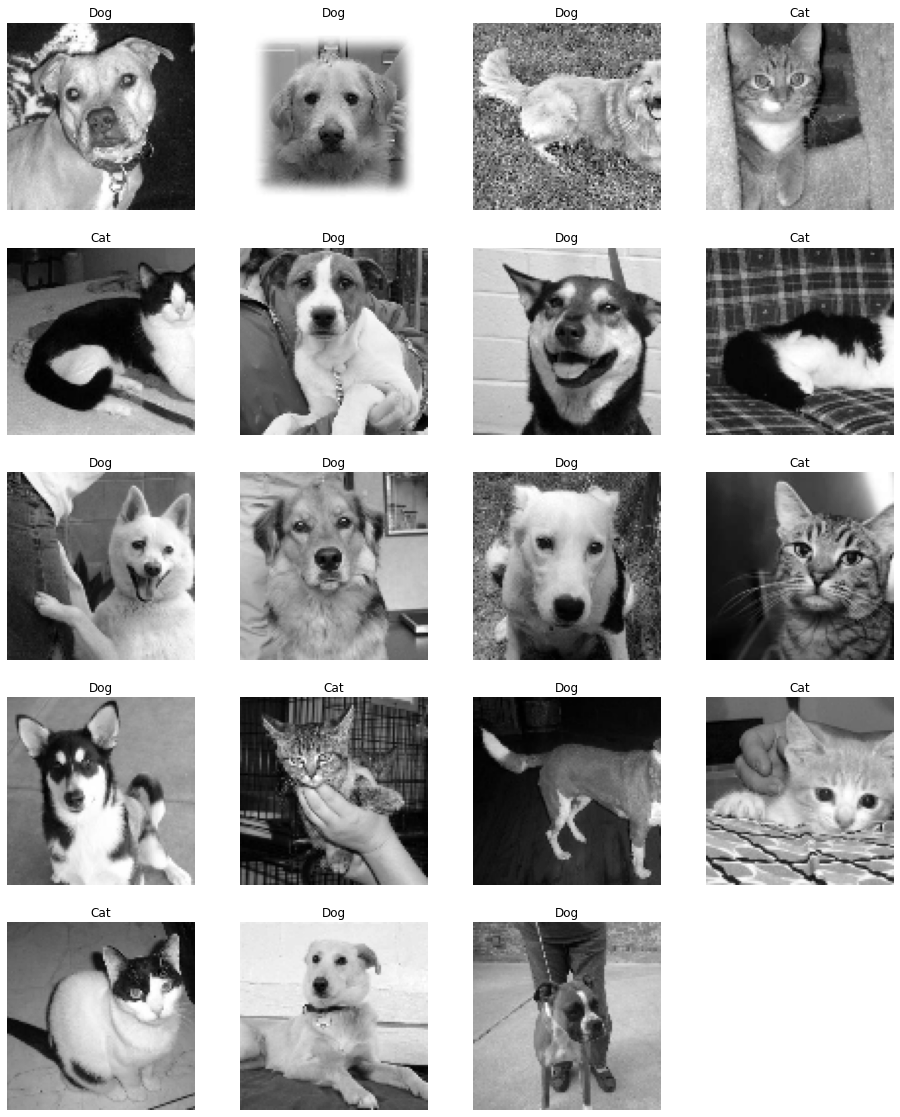

In [ ]:
eval_images = [preprocess(load_image(file)) for file in uploads.keys()]
# eval_model = tf.keras.Sequential(layers)
# eval_model.load_weights("model.tf")
eval_predictions = model.predict(np.expand_dims(eval_images, axis=-1))

cols = 4
rows = np.ceil(len(eval_images)/cols)
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)
for i in range(len(eval_images)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(eval_images[i], cmap="gray")
    plt.title("Dog" if np.argmax(eval_predictions[i])==1 else "Cat")
    plt.axis('off')

Text(0.5, 1.0, 'Dog')

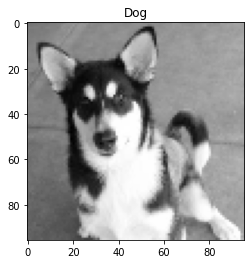

In [ ]:
index = 12 
plt.plot(1,2,2)
plt.imshow(eval_images[index], cmap="gray")
plt.title("Dog" if np.argmax(eval_predictions[index])==1 else "Cat")